In [1]:
from smart_open import open
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

# Load data for all positions

In [2]:
data = pd.read_csv("../data/training_pruned_file_20162021.csv")

In [3]:
players = data

In [4]:
sorted(players.columns.values)

['accurate_crosses.total',
 'accurate_passes.total',
 'aerials_won.total',
 'agent_name',
 'bench.total',
 'big_chances_created.total',
 'big_chances_missed.total',
 'birth.country',
 'blocked_shots.total',
 'captain.total',
 'cards.red',
 'cards.yellow',
 'cards.yellowred',
 'clearances.total',
 'common_name',
 'continent',
 'country_name',
 'date',
 'date_of_birth',
 'dispossessed.total',
 'dribbled_past.total',
 'dribbles.attempts',
 'dribbles.past',
 'dribbles.success',
 'duels.total',
 'duels.won',
 'duels_won.total',
 'error_lead_to_goal.total',
 'firstname_x',
 'foot',
 'fouls.committed',
 'fouls.drawn',
 'fouls.total',
 'fouls_drawn.total',
 'games.appearences',
 'games.captain',
 'games.lineups',
 'games.minutes',
 'games.number',
 'games.position',
 'games.rating',
 'gender',
 'global_performance',
 'goals.assists',
 'goals.conceded',
 'goals.goals',
 'goals.penalties',
 'goals.saves',
 'goals.total_y',
 'height_x',
 'highest_market_value_in_eur',
 'hit_woodwork.total',
 'int

In [5]:
data["league_name"].unique()

array(['Premier League', 'Ligue 1', 'Bundesliga', 'Serie A', 'La Liga'],
      dtype=object)

## Select variables

In [6]:
players_selected_vars = players[[
    "name",
    "player_id_api",
    "date_of_birth",
    "nationality",
    "team_name",
    'league_name',
     'league.season',
    # "error_lead_to_goal.total",
    # "saves_inside_box.total",
    "games.appearences",
    "games.lineups",
    "games.minutes",
    # "goals.conceded",
    # "goals.saves",
    # "penalty.saved",
    # "highest_market_value_in_eur",
    "market_value_in_eur_x",
    # "own_goals.total",
    "position",
    "position_name_y",
    "height_x",
    "accurate_crosses.total",
    "accurate_passes.total",
    "aerials_won.total",
    "big_chances_created.total",
    "big_chances_missed.total",
    "blocked_shots.total",
    "clearances.total",
    "dribbled_past.total",
    "duels_won.total",
    "error_lead_to_goal.total",
    "fouls.total",
    "goals.goals",
    "interceptions.total",
    "offsides.total",
    "redcards.away",
    "redcards.home",
    "redcards.total",
    "saves_inside_box.total",
    "shots_off_target.total",
    "tackles.total_x",
    "through_balls.total",
    "total_crosses.total",
    "total_duels.total",
    "yellowcards.away",
    "yellowcards.home",
    "yellowcards.total",
    "yellowred_cards.away",
    "yellowred_cards.home",
    "yellowred_cards.total",
    "shots.total",
    "shots.on",
    "goals.total_y",
    "goals.conceded",
    "goals.assists",
    "goals.saves",
    "passes.total_y",
    "passes.key",
    "passes.accuracy",
    "tackles.total_y",
    "tackles.blocks",
    "tackles.interceptions",
    "duels.total",
    "duels.won",
    "dribbles.attempts",
    "dribbles.success",
    "dribbles.past",
    "fouls.committed",
    "cards.yellow",
    "cards.yellowred",
    "cards.red",
    "penalty.commited",
    "penalty.saved",
]].copy().rename({
    "team_name": "team",
    "league_name": "league",
    "league.season": "season",
    "games.appearences": "matches_played",
    "games.lineups": "matches_started",
    "games.minutes": "minutes",
    # "goals.conceded": "goals_against",
    # "goals.saves": "saves",
    # "saves_inside_box.total": "saves_inside_box",
    # "penalty.saved": "penalty_kicks_saves",
    # "own_goals.total": "own_goals_against",
    # "error_lead_to_goal.total": "errors_to_goal",
    "market_value_in_eur_x": "market_value",
}, axis=1)
players_selected_vars["90s_played"] = players_selected_vars["minutes"] / 90
# players_selected_vars["goals_against_90s"] = players_selected_vars["goals_against"] / players_selected_vars["90s_played"]
# players_selected_vars["shots_on_target_against"] = players_selected_vars["goals_against"] + players_selected_vars["saves"]
# players_selected_vars["save%"] = players_selected_vars["saves"] / players_selected_vars["shots_on_target_against"]
# players_selected_vars["age"] = pd.to_datetime(players_selected_vars["date_of_birth"]).map(lambda x: int((pd.Timestamp.today() - x).days / 365))
players_selected_vars["age"] = (30 - (players["league.season"] - players["date_of_birth"].str.slice(0, 4).astype(int)))
players_selected_vars["age2"] = players_selected_vars["age"] ** 2
# players_selected_vars["own_goals_against"] = players_selected_vars["own_goals_against"].fillna(0)
for per_90 in [
    # "shots_on_target_against",
    # "saves_inside_box",
    # "saves",
    # "penalty_kicks_saves",
    # "own_goals_against",
    # "goals_against",
    # "accurate_crosses.total",
    # "big_chances_created.total",
    # "big_chances_missed.total",
    # "blocked_shots.total",
    # "dribbled_past.total",
    # "goals.goals",
    # "offsides.total",
    # "shots_off_target.total",
    # "through_balls.total",
    # "total_crosses.total",
    # "shots.total",
    # "shots.on",
    # "goals.total_y",
    # "goals.assists",
    # "passes.key",
    # "dribbles.attempts",
    # "dribbles.success",
    # "dribbles.past",
]:
    players_selected_vars[per_90] = players_selected_vars[per_90] / players_selected_vars["90s_played"]


players_selected_vars.replace([np.inf, -np.inf], np.nan, inplace=True)
    
players_selected_vars = players_selected_vars.drop([
    "date_of_birth",
    "minutes",
], axis=1)

order = [
    "name",
    "player_id_api",
    "age",
    "age2",
    "nationality",
    "league",
    "team",
    "season",
    "matches_played",
    "matches_started",
    # "minutes",
    "90s_played",
    # "goals_against",
    # "own_goals_against",
    # "shots_on_target_against",
    # "saves",
    # "save%",
    # "saves_inside_box",
    # "penalty_kicks_saves",
    "market_value",
    "position",
    "position_name_y",
    "height_x",
    "accurate_crosses.total",
    "accurate_passes.total",
    "aerials_won.total",
    "big_chances_created.total",
    "big_chances_missed.total",
    "blocked_shots.total",
    "clearances.total",
    "dribbled_past.total",
    "duels_won.total",
    "error_lead_to_goal.total",
    "fouls.total",
    "goals.goals",
    "interceptions.total",
    "offsides.total",
    "redcards.away",
    "redcards.home",
    "redcards.total",
    "saves_inside_box.total",
    "shots_off_target.total",
    "tackles.total_x",
    "through_balls.total",
    "total_crosses.total",
    "total_duels.total",
    "yellowcards.away",
    "yellowcards.home",
    "yellowcards.total",
    "yellowred_cards.away",
    "yellowred_cards.home",
    "yellowred_cards.total",
    "shots.total",
    "shots.on",
    "goals.total_y",
    "goals.conceded",
    "goals.assists",
    "goals.saves",
    "passes.total_y",
    "passes.key",
    "passes.accuracy",
    "tackles.total_y",
    "tackles.blocks",
    "tackles.interceptions",
    "duels.total",
    "duels.won",
    "dribbles.attempts",
    "dribbles.success",
    "dribbles.past",
    "fouls.committed",
    "cards.yellow",
    "cards.yellowred",
    "cards.red",
    "penalty.commited",
    "penalty.saved",
]
players_selected_vars = players_selected_vars[order + list(set(players_selected_vars.columns).difference(order))]
players_selected_vars

,name,player_id_api,age,age2,nationality,league,team,season,matches_played,matches_started,...,duels.won,dribbles.attempts,dribbles.success,dribbles.past,fouls.committed,cards.yellow,cards.yellowred,cards.red,penalty.commited,penalty.saved
0,George Thomas,20479,10,100,Wales,Premier League,Leicester City,2017,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
1,Harvey Lewis Barnes,18778,10,100,England,Premier League,Leicester City,2017,3.0,0.0,...,1.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN,NaN
2,Andy King,19217,1,1,Wales,Premier League,Leicester City,2017,11.0,9.0,...,24.0,4.0,1.0,NaN,5.0,1.0,0.0,0.0,NaN,NaN
3,Marc Albrighton,18777,2,4,England,Premier League,Leicester City,2017,34.0,30.0,...,140.0,95.0,52.0,NaN,20.0,5.0,0.0,1.0,1.0,NaN
4,Kelechi Promise Iheanacho,2778,9,81,Nigeria,Premier League,Leicester City,2017,21.0,7.0,...,37.0,18.0,13.0,NaN,17.0,2.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14768,Matěj Vydra,18930,1,1,Czech Republic,Premier League,Burnley,2021,22.0,5.0,...,44.0,14.0,6.0,NaN,9.0,1.0,0.0,0.0,NaN,NaN
14769,Josh Brownhill,19268,4,16,England,Premier League,Burnley,2021,35.0,32.0,...,155.0,30.0,15.0,NaN,39.0,10.0,0.0,0.0,NaN,NaN
14770,Ashley Barnes,18927,-2,4,England,Premier League,Burnley,2021,23.0,8.0,...,77.0,8.0,5.0,NaN,21.0,4.0,0.0,0.0,NaN,NaN
14771,Wout Weghorst,25416,1,1,Netherlands,Premier League,Burnley,2021,18.0,17.0,...,96.0,8.0,7.0,NaN,17.0,2.0,0.0,0.0,NaN,NaN


In [7]:
from helpers import TEAM_TIERS

In [8]:
players_selected_vars = pd.merge(players_selected_vars, TEAM_TIERS, left_on="team", right_index=True)

In [9]:
players_selected_vars.loc[players_selected_vars["tier"] == "-1", "tier"] = None

In [ ]:
# for c in players_selected_vars.columns:
#     players_selected_vars[f"has_{c}"] = (~players_selected_vars[c].isnull()).astype(int)

In [10]:
mvs = players_selected_vars["market_value"].values
mvs = np.expand_dims(mvs, axis=1)
mvs = normalize(mvs, norm="max", axis=0)
mvs = np.squeeze(mvs)
players_selected_vars["normalised_market_value"] = mvs

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [45]:
market_values = players_selected_vars[["player_id_api", "season", "market_value"]]
market_values["season"] = market_values["season"] +1
market_values

/var/folders/h8/j63w626x3ds50k3yc8j6xtwh0000gn/T/ipykernel_88090/2427455660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_values["season"] = market_values["season"] +1


,player_id_api,season,market_value
0,20479,2018,500000
1,18778,2018,250000
2,19217,2018,3000000
3,18777,2018,10000000
4,2778,2018,15000000
...,...,...,...
14683,113591,2022,2000000
14684,25160,2022,450000
14685,24987,2022,700000
14686,25018,2022,600000


In [46]:
players_selected_vars = pd.merge(players_selected_vars, market_values, on=["player_id_api", "season"], suffixes = ["", "_prev"])

In [47]:
mv_changes = pd.merge(players_selected_vars, players_selected_vars, on="player_id_api", suffixes=["_l","_r"]).query("season_r - season_l == 1")[["player_id_api", "season_r","market_value_r", "market_value_l"]]
mv_changes["change"] = (mv_changes["market_value_r"] - mv_changes["market_value_l"]) / mv_changes["market_value_l"] * 100
mv_changes = mv_changes.drop(columns=["market_value_r", "market_value_l"]).rename(columns={"season_r": "season"})
mv_changes

,player_id_api,season,change
2,114,2019,-38.461538
3,114,2019,-38.461538
8,114,2019,-38.461538
9,114,2019,-38.461538
16,114,2020,-62.500000
...,...,...,...
35232,19191,2021,6.666667
35237,84,2021,-53.846154
35241,19185,2021,-16.666667
35246,76,2021,0.000000


## Transformation pipeline

In [48]:
numeric_features = [
    "market_value_prev",
    "age",
    "age2",
    "matches_played",
    "matches_started",
    "90s_played",
    # "goals_against",
    # "own_goals_against",
    # "shots_on_target_against",
    # "saves",
    # "save%",
    # "saves_inside_box",
    # "penalty_kicks_saves",
    "height_x",
    "accurate_crosses.total",
    "accurate_passes.total",
    "aerials_won.total",
    "big_chances_created.total",
    "big_chances_missed.total",
    "blocked_shots.total",
    "clearances.total",
    "dribbled_past.total",
    "duels_won.total",
    "error_lead_to_goal.total",
    "fouls.total",
    "goals.goals",
    "interceptions.total",
    "offsides.total",
    "redcards.away",
    "redcards.home",
    "redcards.total",
    "saves_inside_box.total",
    "shots_off_target.total",
    "tackles.total_x",
    "through_balls.total",
    "total_crosses.total",
    "total_duels.total",
    "yellowcards.away",
    "yellowcards.home",
    "yellowcards.total",
    "yellowred_cards.away",
    "yellowred_cards.home",
    "yellowred_cards.total",
    "shots.total",
    "shots.on",
    "goals.total_y",
    "goals.conceded",
    "goals.assists",
    "goals.saves",
    "passes.total_y",
    "passes.key",
    "passes.accuracy",
    "tackles.total_y",
    "tackles.blocks",
    "tackles.interceptions",
    "duels.total",
    "duels.won",
    "dribbles.attempts",
    "dribbles.success",
    "dribbles.past",
    "fouls.committed",
    "cards.yellow",
    "cards.yellowred",
    "cards.red",
    "penalty.commited",
    "penalty.saved",
]
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)

# binary_features = [f"has_{c}" for c in numeric_features if f"has_{c}" in players_selected_vars.columns]
# binary_transformer = Pipeline(
#     steps=[
#         ("imputer", SimpleImputer(strategy="constant", fill_value=0))
#     ]
# )

categorical_features = [
    "nationality",
    "league",
    "team",
    "tier",
    "position",
    "position_name_y",
]
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        # ("bin", binary_transformer, binary_features),
    ]
)

# Predict price bucket

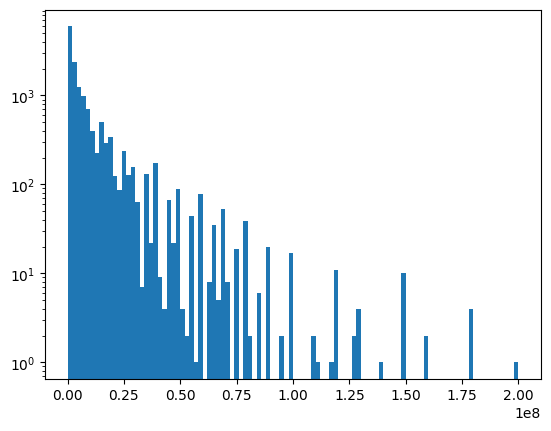

In [14]:
plt.hist(players_selected_vars["market_value"], bins=100)
# plt.xlim((0, 0.5e8))
plt.yscale("log")

In [15]:
bins = [
    0.0025,
    0.005,
    0.01,
    0.025,
    0.05, # 
    0.1, # 8 - 20
    0.25, # 20 - 40
    0.5,  # 40 -80
    1.0  # 80M
]
y = np.digitize(players_selected_vars["normalised_market_value"], bins)
# bins = np.concatenate([
#     np.arange(200_000, 4_000_000, 200_000),
#     np.arange(4_000_000, 20_000_000, 2_000_000),
#     np.arange(20_000_000, 100_000_000, 5_000_000),
#     np.arange(100_000_000, 200_000_001, 10_000_000)
# ])
# y = np.digitize(players_selected_vars["market_value"], bins)
X = players_selected_vars

In [16]:
goalkeepers = (X["position"] == "Goalkeeper").values
attackers = (X["position"] == "Attack").values
defenders = (X["position"] == "Defender").values
midfielders = (X["position"] == "Midfield").values

(
    X_train, X_test, 
    y_train, y_test, 
    goalkeepers_train, goalkeepers_test,
    attackers_train, attackers_test,
    defenders_train, defenders_test, 
    midfielders_train, midfielders_test
) = train_test_split(
    X, y, 
    goalkeepers, attackers, defenders, midfielders,
    test_size=0.2, random_state=42
)

In [17]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1698, 1062, 1504, 2629, 1824, 1463, 1258,  322,   41,    1]))

In [18]:
random = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", DummyClassifier(strategy="stratified")),
    ]
)
random.fit(X_train, y_train)

y_random = random.predict(X_test)

balanced_accuracy_score(y_test, y_random)

/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.10710095363726749

In [19]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector], random.predict(X_test[selector])))

goalkeepers 0.10359905989064051
attackers 0.12286043514436039
defenders 0.11191405997446044
midfielders 0.11127595081842036


/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [ ]:
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("classifier", LogisticRegression()),
    ]
)
clf.fit(X_train, y_train)

y_lr = clf.predict(X_test)

balanced_accuracy_score(y_test, y_lr)

In [ ]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector], clf.predict(X_test[selector])))

Only model specific to goalkeepers performs better on that position than the "all positions" model.
Performance on other positions is similar or marginally better with the generic model.

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("classifier", MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(16, 8))),
    ]
)
mlp.fit(X_train, y_train)

y_mlp = mlp.predict(X_test)

balanced_accuracy_score(y_test, y_mlp)

In [ ]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector], mlp.predict(X_test[selector])))

Models specific for goalkeeprs and midfielders are slighlty better than one generic model.

In [ ]:
from xgboost import XGBClassifier

xgboost = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("classifier", XGBClassifier(learning_rate=1)),
    ]
)
xgboost.fit(X_train, y_train)

y_xgboost = xgboost.predict(X_test)

balanced_accuracy_score(y_test, y_xgboost)

In [ ]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector], xgboost.predict(X_test[selector])))

In [ ]:
from collections import defaultdict
arr = np.zeros((10, 10))
for a, b in zip(y_test, y_xgboost):
    arr[a, b] = arr[a, b] + 1

In [ ]:
arr

In [ ]:
plt.imshow(arr, cmap='hot')
plt.xlabel("Observed")
plt.ylabel("Predicted")
_ = plt.show()

In [ ]:
x = np.unique(y_test - y_xgboost, return_counts=True)
a, b =x

In [ ]:
cnt = 0
for q,w in zip(a, b):
    print(q, w)
    cnt += w
cnt

In [ ]:
(583 + 1397 + 569) / 2951

In [ ]:
np.unique(y_lr, return_counts=True)

## Features importance

In [ ]:
result = permutation_importance(
    xgboost, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=X_test.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

# Predict market value

In [20]:
from sklearn.metrics import r2_score

In [49]:
def r2_adj(model, x, y):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    return 1-(1-r2)*(n-1)/(n-p-1)

def r2_adj2(x, y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    n = x.shape[0]
    p = x.shape[1]
    return 1-(1-r2)*(n-1)/(n-p-1)

In [50]:
players_with_same_values = set(pd.merge(players_selected_vars, players_selected_vars, on="player_id_api").query("season_x - season_y == 1").query("market_value_x == market_value_y")["player_id_api"].unique())

In [51]:
appearances = 15
X = players_selected_vars.loc[lambda x: np.logical_and(x["matches_played"] >= appearances, x["market_value"] != x["market_value_prev"])]
# y = players_selected_vars["normalised_market_value"]
y = np.log(players_selected_vars.loc[lambda x: np.logical_and(x["matches_played"] >= appearances, x["market_value"] != x["market_value_prev"])]["market_value"])
# y = players_selected_vars["market_value"]

In [52]:
X_train = X.loc[X["season"] <= 2020]
X_test = X.loc[X["season"] == 2021]
y_train = y.loc[X["season"] <= 2020]
y_test = y.loc[X["season"] == 2021]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3872, 70), (1298, 70), (3872,), (1298,))

In [53]:
selectors_train = dict()
selectors_test = dict()
for p in ["Goalkeeper", "Attack", "Defender", "Midfield"]:
    selectors_train[p] = (X_train["position"] == p).values
    selectors_test[p] = (X_test["position"] == p).values

In [26]:
# goalkeepers = (X["position"] == "Goalkeeper").values
# attackers = (X["position"] == "Attack").values
# defenders = (X["position"] == "Defender").values
# midfielders = (X["position"] == "Midfield").values

# (
#     X_train, X_test, 
#     y_train, y_test, 
#     goalkeepers_train, goalkeepers_test,
#     attackers_train, attackers_test,
#     defenders_train, defenders_test, 
#     midfielders_train, midfielders_test
# ) = train_test_split(
#     X, y, 
#     goalkeepers, attackers, defenders, midfielders,
#     test_size=0.2, random_state=42
# )

In [54]:
random_regression = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regression", DummyRegressor()),
    ]
)
random_regression.fit(X_train, y_train)

for _X, _y in ((X_train, y_train), (X_test, y_test)):
    print(random_regression.score(_X, _y), r2_adj(random_regression, _X, _y))

0.0 -0.018416206261510082
-0.0012634355161216249 -0.05838522890334952


In [55]:
for name, selector in selectors_test.items():
    print(name, random_regression.score(X_test[selector], y_test[selector]), r2_adj(random_regression, X_test[selector], y_test[selector]))

Goalkeeper -0.06025493984578234 -9.337485663496377
Attack -0.005667528707796299 -0.1959289530579198
Defender -0.02150912049758591 -0.20968185322082555
Midfield -0.00028689264513470647 -0.27380283985278875


In [56]:
y_2020 = X_train.loc[X_train["season"] == 2020].groupby("player_id_api")["market_value"].mean()
y_prev = pd.merge(
    y_2020,
    X_test,
    left_index=True,
    right_on="player_id_api",
    how="right"
)["market_value_x"].fillna(y_2020.mean())

In [57]:
# X_test2 = X_test[~pd.isna(y_prev)]
# y_test2 = y_test[~pd.isna(y_prev)]
# y_prev2 = y_prev[~pd.isna(y_prev)]

In [58]:
r2_score(np.exp(y_test), y_prev), r2_adj2(X_test, np.exp(y_test), y_prev)
# r2_score(np.exp(y_test2), y_prev2), r2_adj2(X_test2, np.exp(y_test2), y_prev2)

(0.6503795791568652, 0.6304338338764908)

In [59]:
for name, selector in selectors_test.items():
    print(name, r2_score(np.exp(y_test)[selector], y_prev[selector]), r2_adj2(X_test[selector], np.exp(y_test)[selector], y_prev[selector]))

Goalkeeper 0.4462713395698712 -4.398854439193756
Attack 0.7094381932680228 0.6544670406430542
Defender 0.5972008292981539 0.5230009820636032
Midfield 0.5812799834508202 0.4667862289256539


In [60]:
regression = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regression", LinearRegression()),
    ]
)
regression.fit(X_train, y_train)

y_reg = regression.predict(X_test)

# regression.score(X_test, y_test), r2_adj(regression, X_test, y_test)
r2_score(np.exp(y_test), np.exp(y_reg)), r2_adj2(X_test, np.exp(y_test), np.exp(y_reg))

(0.600337324651798, 0.5775366830263913)

In [61]:
for name, selector in selectors_test.items():
    y_reg = regression.predict(X_test[selector])
    print(name, r2_score(np.exp(y_test[selector]), np.exp(y_reg)), r2_adj2(X_test[selector], np.exp(y_test[selector]), np.exp(y_reg)))
    # print(name, regression.score(X_test[selector], y_test[selector]), r2_adj(regression, X_test[selector], y_test[selector]))

Goalkeeper 0.9230316901626954 0.2495589790862799
Attack 0.5091890772284515 0.41633295670410453
Defender 0.7538735127088223 0.708534422944658
Midfield 0.5778149835017354 0.46237376805299124


Only model specific for midfielder is slightly better than the generic one.

In [62]:
from sklearn.neural_network import MLPRegressor

mlp_reg = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("regression", MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(16, 8))),
    ]
)
mlp_reg.fit(X_train, y_train)

y_mlp = mlp_reg.predict(X_test)

# mlp_reg.score(X_test, y_test), r2_adj(mlp_reg, X_test, y_test)
r2_score(np.exp(y_test), np.exp(y_mlp)), r2_adj2(X_test, np.exp(y_test), np.exp(y_mlp))

/Users/jwasilewski/Library/Caches/pypoetry/virtualenvs/models-wTMcHaj6-py3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


(0.849931494428249, 0.8413701289922078)

In [63]:
for name, selector in selectors_test.items():
    y_mlp = mlp_reg.predict(X_test[selector])
    print(name, r2_score(np.exp(y_test[selector]), np.exp(y_mlp)), r2_adj2(X_test[selector], np.exp(y_test[selector]), np.exp(y_mlp)))
    # print(name, mlp_reg.score(X_test[selector], y_test[selector]), r2_adj(mlp_reg, X_test[selector], y_test[selector]))

Goalkeeper 0.8500438340305521 -0.46207261820211754
Attack 0.8812647465080024 0.8588013201716784
Defender 0.7882564563572435 0.749251066738841
Midfield 0.8334334485882413 0.7878879071865885


"All positions" model performs better than position specific models.

In [64]:
from xgboost import XGBRegressor

xgboost_reg = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("regression", XGBRegressor()),
    ]
)
xgboost_reg.fit(X_train, y_train)

y_xgboost = xgboost_reg.predict(X_test)


# xgboost_reg.score(X_test, y_test), r2_adj(xgboost_reg, X_test, y_test)
print(xgboost_reg.score(X_train, y_train), r2_adj(xgboost_reg, X_train, y_train), xgboost_reg.score(X_test, y_test), r2_adj(xgboost_reg, X_test, y_test))

0.9885505156561355 0.988339659590871 0.8823688867556252 0.8756580652991409


In [65]:
###### from xgboost import XGBRegressor

xgboost_reg = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("regression", XGBRegressor(n_estimators=1000, max_depth=2, reg_lambda=40, reg_alpha=0)),
    ]
)
xgboost_reg.fit(X_train, y_train)

print(xgboost_reg.score(X_train, y_train), r2_adj(xgboost_reg, X_train, y_train), xgboost_reg.score(X_test, y_test), r2_adj(xgboost_reg, X_test, y_test))

0.9633851025646597 0.9627107950612465 0.8929759419078254 0.8868702499221267


In [66]:
for name, selector in selectors_test.items():
    print(name, xgboost_reg.score(X_test[selector], y_test[selector]), r2_adj(xgboost_reg, X_test[selector], y_test[selector]))

Goalkeeper 0.9280313429731948 0.2983055939886492
Attack 0.9187593551692886 0.9033895034445595
Defender 0.851713267106194 0.824397289994177
Midfield 0.9002446512991482 0.872967798138759


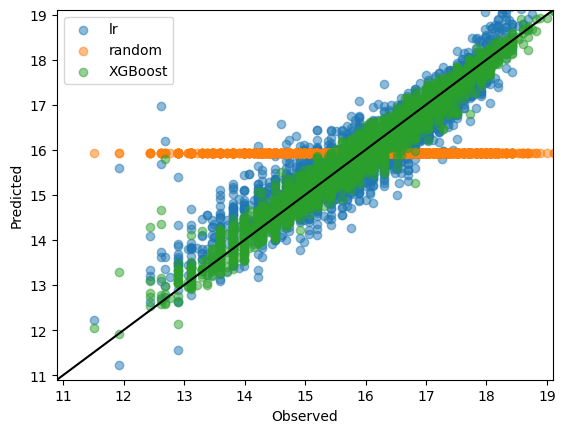

In [67]:
plt.scatter(y_train, regression.predict(X_train), alpha=0.5, label="lr")
plt.scatter(y_train, random_regression.predict(X_train), alpha=0.5, label="random")
# plt.scatter(y_train, mlp_reg.predict(X_train), alpha=0.5, label="MLP")
plt.scatter(y_train, xgboost_reg.predict(X_train), alpha=0.5, label="XGBoost")
plt.axline((0, 0), (1, 1), c="k")
plt.xlim(np.floor(y_train.min())-0.1, np.ceil(y_test.max())+0.1)
plt.ylim(np.floor(y_train.min())-0.1, np.ceil(y_test.max())+0.1)
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.legend()
_ = plt.show()

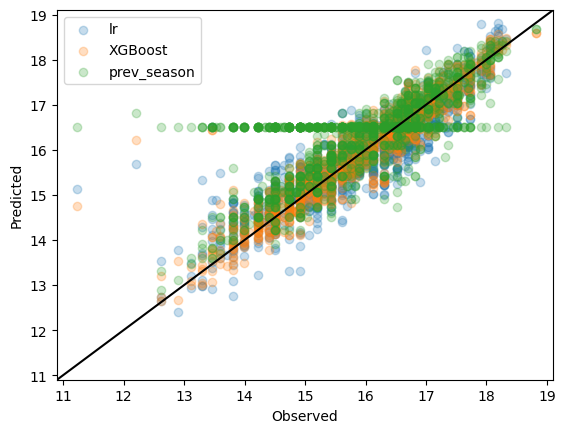

In [68]:
plt.scatter(y_test, regression.predict(X_test), alpha=0.25, label="lr")
# plt.scatter(y_test, random_regression.predict(X_test), alpha=0.5, label="random")
# plt.scatter(y_test, mlp_reg.predict(X_test), alpha=0.25, label="MLP")
plt.scatter(y_test, xgboost_reg.predict(X_test), alpha=0.25, label="XGBoost")
plt.scatter(y_test, np.log(y_prev), alpha=0.25, label="prev_season")
plt.axline((0, 0), (1, 1), c="k")
plt.xlim(np.floor(y_test.min())-0.1, np.ceil(y_test.max())+0.1)
plt.ylim(np.floor(y_test.min())-0.1, np.ceil(y_test.max())+0.1)
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.legend()
_ = plt.show()

In [69]:
reg_results = pd.DataFrame({
    "y": np.exp(y_test),
    "y_pred": np.exp(xgboost_reg.predict(X_test))
    # "y_pred": np.exp(regression.predict(X_test))
    # "y": y_test,
    # "y_pred": xgboost_reg.predict(X_test)
})
reg_results["diff"] = reg_results["y_pred"] - reg_results["y"]
reg_results["rel_error"] = reg_results["diff"] / reg_results["y"] * 100
reg_results["abs_rel_error"] = np.abs(reg_results["rel_error"])
reg_results = reg_results.sort_values("abs_rel_error")
reg_results

,y,y_pred,diff,rel_error,abs_rel_error
4566,4000000.0,4003443.00,3443.00,0.086075,0.086075
968,40000000.0,39960604.00,-39396.00,-0.098490,0.098490
3655,5000000.0,5008486.50,8486.50,0.169730,0.169730
3656,5000000.0,5008486.50,8486.50,0.169730,0.169730
4477,3000000.0,2994579.50,-5420.50,-0.180683,0.180683
...,...,...,...,...,...
8025,1000000.0,3625619.25,2625619.25,262.561925,262.561925
5745,700000.0,13905406.00,13205406.00,1886.486571,1886.486571
5744,700000.0,13905406.00,13205406.00,1886.486571,1886.486571
4574,75000.0,2534701.50,2459701.50,3279.602000,3279.602000


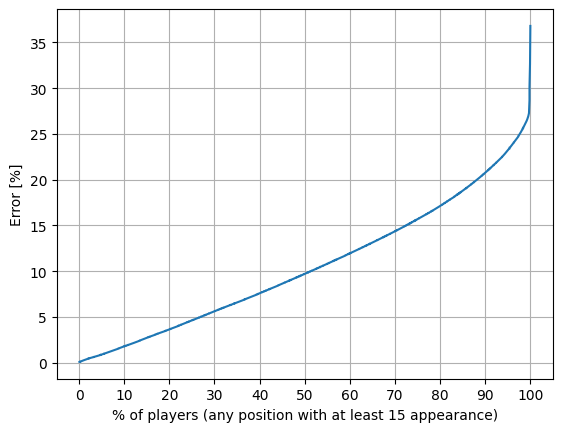

In [70]:
plt.plot(
    reg_results["abs_rel_error"].rank() / len(reg_results["abs_rel_error"]) * 100,
    reg_results["abs_rel_error"].cumsum() / reg_results["abs_rel_error"].rank()
)
plt.xticks(np.linspace(0, 1, 11)*100)
plt.xlabel("% of players (any position with at least 15 appearance)")
plt.ylabel("Error [%]")
plt.grid()
plt.show()

In [71]:
np.mean(reg_results["abs_rel_error"])

36.808093488809305

## Features importance

In [ ]:
result = permutation_importance(
    xgboost_reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

In [ ]:
non_zero_feats = np.abs(result.importances_mean) > 1e-03
forest_importances = pd.Series(result.importances_mean[non_zero_feats], index=X_test.columns.values[non_zero_feats])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std[non_zero_feats], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

# Predict change in market value between seasons

In [ ]:
before_after_seasons = pd.merge(
    players_selected_vars, 
    players_selected_vars, 
    on="player_id_api", 
    suffixes=["_before", "_after"]
).query("season_after - season_before == 1")

In [ ]:
numeric_features_ba = [
    f"{c}_{suffix}" for c in [
        "age",
        "matches_played",
        "matches_started",
        "90s_played",
        # "goals_against",
        # "own_goals_against",
        # "shots_on_target_against",
        # "saves",
        # "save%",
        # "saves_inside_box",
        # "penalty_kicks_saves",
    "height_x",
    "accurate_crosses.total",
    "accurate_passes.total",
    "aerials_won.total",
    "big_chances_created.total",
    "big_chances_missed.total",
    "blocked_shots.total",
    "clearances.total",
    "dribbled_past.total",
    "duels_won.total",
    "error_lead_to_goal.total",
    "fouls.total",
    "goals.goals",
    "interceptions.total",
    "offsides.total",
    "redcards.away",
    "redcards.home",
    "redcards.total",
    "saves_inside_box.total",
    "shots_off_target.total",
    "tackles.total_x",
    "through_balls.total",
    "total_crosses.total",
    "total_duels.total",
    "yellowcards.away",
    "yellowcards.home",
    "yellowcards.total",
    "yellowred_cards.away",
    "yellowred_cards.home",
    "yellowred_cards.total",
    "shots.total",
    "shots.on",
    "goals.total_y",
    "goals.conceded",
    "goals.assists",
    "goals.saves",
    "passes.total_y",
    "passes.key",
    "passes.accuracy",
    "tackles.total_y",
    "tackles.blocks",
    "tackles.interceptions",
    "duels.total",
    "duels.won",
    "dribbles.attempts",
    "dribbles.success",
    "dribbles.past",
    "fouls.committed",
    "cards.yellow",
    "cards.yellowred",
    "cards.red",
    "penalty.commited",
    "penalty.saved",
    ]
    for suffix in ["before","after"]
]
numeric_transformer_ba = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)

categorical_features_ba = [
    f"{c}_{suffix}" for c in [
        "nationality",
        "league",
        "team",
        "tier",
        "position",
    ]
    for suffix in ["before","after"]
]
categorical_transformer_ba = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor_ba = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_ba, numeric_features_ba),
        ("cat", categorical_transformer_ba, categorical_features_ba),
    ]
)

In [ ]:
X = before_after_seasons
y_before = np.digitize(before_after_seasons["normalised_market_value_before"], bins)
y_after = np.digitize(before_after_seasons["normalised_market_value_after"], bins)
y = np.minimum(np.maximum(y_after - y_before, -1), 1)

In [ ]:
goalkeepers = (X["position_before"] == "Goalkeeper").values
attackers = (X["position_before"] == "Attack").values
defenders = (X["position_before"] == "Defender").values
midfielders = (X["position_before"] == "Midfield").values

(
    X_train, X_test, 
    y_train, y_test, 
    goalkeepers_train, goalkeepers_test,
    attackers_train, attackers_test,
    defenders_train, defenders_test, 
    midfielders_train, midfielders_test
) = train_test_split(
    X, y, 
    goalkeepers, attackers, defenders, midfielders,
    test_size=0.2, random_state=42
)

In [ ]:
random = Pipeline(
    steps=[
        ("preprocessor", preprocessor_ba),
        ("classifier", DummyClassifier(strategy="stratified")),
    ]
)
random.fit(X_train, y_train)

balanced_accuracy_score(y_test, random.predict(X_test))

In [ ]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector], random.predict(X_test[selector])))

In [ ]:
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor_ba), 
        ("classifier", LogisticRegression()),
    ]
)
clf.fit(X_train, y_train)

print(confusion_matrix(y_test, clf.predict(X_test), labels=[1, 0, -1]))

balanced_accuracy_score(y_test, clf.predict(X_test))

In [ ]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector], clf.predict(X_test[selector])))

"All positions" model performs better on all positions.

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = Pipeline(
    steps=[
        ("preprocessor", preprocessor_ba), 
        ("classifier", MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(32, 16))),
    ]
)
mlp.fit(X_train, y_train)

print(confusion_matrix(y_test, mlp.predict(X_test), labels=[1, 0, -1]))

balanced_accuracy_score(y_test, mlp.predict(X_test))

In [ ]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector], mlp.predict(X_test[selector])))

Only model specific for midfielders perform marginally better.

In [ ]:
from xgboost import XGBClassifier

xgboost = Pipeline(
    steps=[
        ("preprocessor", preprocessor_ba), 
        ("classifier", XGBClassifier()),
    ]
)
xgboost.fit(X_train, y_train+1)

y_xgboost = xgboost.predict(X_test)

balanced_accuracy_score(y_test+1, y_xgboost)

In [ ]:
for name, selector in {
    "goalkeepers": goalkeepers_test, 
    "attackers": attackers_test, 
    "defenders": defenders_test,
    "midfielders": midfielders_test
}.items():
    print(name, balanced_accuracy_score(y_test[selector]+1, xgboost.predict(X_test[selector])))

XGBoost performs here better than MLP, and comparable as position-specific models.

## Features importance

In [ ]:
result = permutation_importance(
    xgboost, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=X_test.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()